In [81]:
import glob as glob
import pandas as pd
import seaborn as sns

In [82]:
# CO Historical precerature (F) and Precipitation (inch/day)
hist = pd.DataFrame()
for file in glob.glob('data/climate/*.parquet'):
    hist = pd.concat([hist, pd.read_parquet(file)])

hist = hist.groupby('date', as_index=False)[['avgtempf','precpinch']].mean()
hist_end_date = hist['date'].max()

In [83]:
# CO RCP Temperature

rcp45_temp = pd.DataFrame()
for file in glob.glob('data/scenarios/rcp45_temp*.parquet'):
    rcp45_temp = pd.concat([rcp45_temp, pd.read_parquet(file)])

rcp45_temp['tempf'] = rcp45_temp['temp'] * 9/5 + 32

rcp85_temp = pd.DataFrame()
for file in glob.glob('data/scenarios/rcp85_temp*.parquet'):
    rcp85_temp = pd.concat([rcp85_temp, pd.read_parquet(file)])

rcp85_temp['tempf'] = rcp85_temp['temp'] * 9/5 + 32

[Text(0.5, 1.0, 'RCP45 Temperature (°F)')]

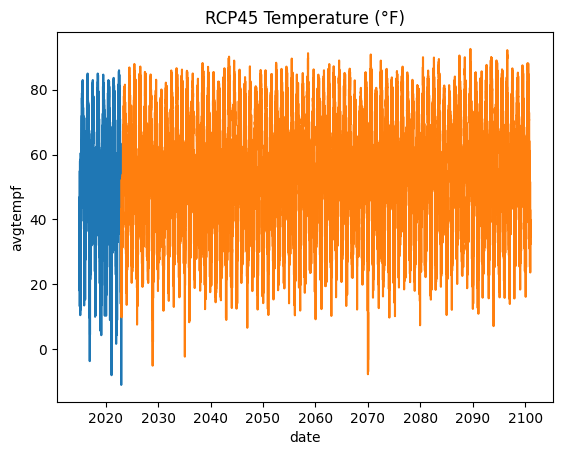

In [84]:
rcp45_temp = rcp45_temp[rcp45_temp['time'] > hist_end_date].drop_duplicates(subset='time')

temp_plot = sns.lineplot(
    hist,
    y='avgtempf',
    x='date',
)

temp_plot = sns.lineplot(
    rcp45_temp,
    y='tempf',
    x='time',
)

temp_plot.set(title='RCP45 Temperature (°F)')

[Text(0.5, 1.0, 'RCP85 Temperature (°F)')]

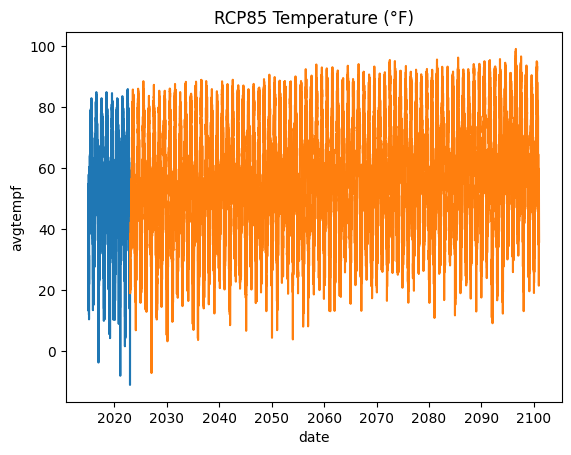

In [85]:
rcp85_temp = rcp85_temp[rcp85_temp['time'] > hist_end_date].drop_duplicates(subset='time')

temp_plot = sns.lineplot(
    hist,
    y='avgtempf',
    x='date',
)

temp_plot = sns.lineplot(
    rcp85_temp,
    y='tempf',
    x='time',
)

temp_plot.set(title='RCP85 Temperature (°F)')

In [86]:
# CO RCP Precipitation

rcp45_prec = pd.DataFrame()
for file in glob.glob('data/scenarios/rcp45_prec*.parquet'):
    rcp45_prec = pd.concat([rcp45_prec, pd.read_parquet(file)])

rcp45_prec['precinch'] = rcp45_prec['prec'] / 25.4 

rcp85_prec = pd.DataFrame()
for file in glob.glob('data/scenarios/rcp85_prec*.parquet'):
    rcp85_prec = pd.concat([rcp85_prec, pd.read_parquet(file)])

rcp85_prec['precinch'] = rcp85_prec['prec'] / 25.4

[Text(0.5, 1.0, 'RCP45 Precipitation (inch/day)')]

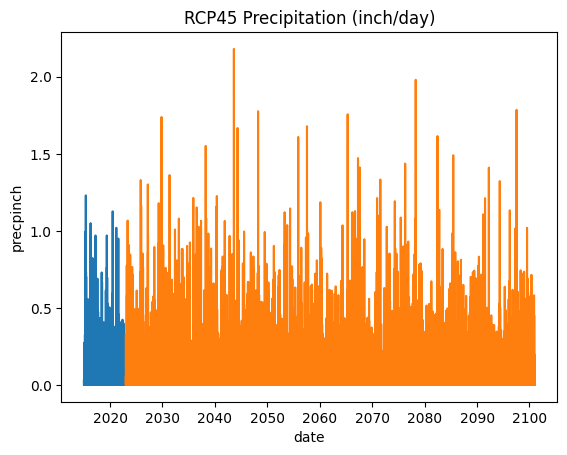

In [87]:
rcp45_prec = rcp45_prec[rcp45_prec['time'] > hist_end_date].drop_duplicates(subset='time')

prec_plot = sns.lineplot(
    hist,
    y='precpinch',
    x='date',
)

prec_plot = sns.lineplot(
    rcp45_prec,
    y='precinch',
    x='time',
)

prec_plot.set(title='RCP45 Precipitation (inch/day)')

[Text(0.5, 1.0, 'RCP85 Precipitation (inch/day)')]

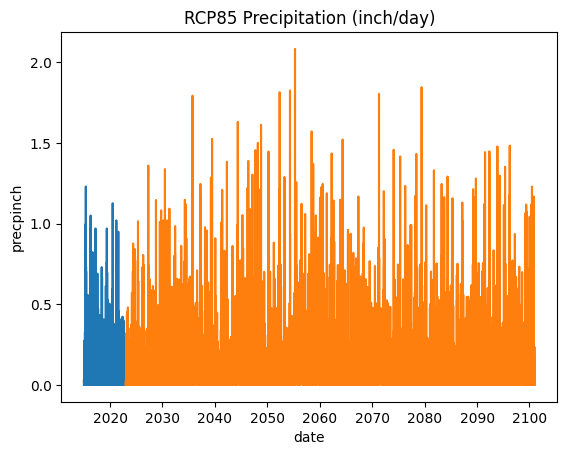

In [90]:
rcp85_prec = rcp85_prec[rcp85_prec['time'] > hist_end_date].drop_duplicates(subset='time')

prec_plot = sns.lineplot(
    hist,
    y='precpinch',
    x='date',
)

prec_plot = sns.lineplot(
    rcp85_prec,
    y='precinch',
    x='time',
)

prec_plot.set(title='RCP85 Precipitation (inch/day)')